In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
iris=datasets.load_iris()

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

print(data)



     sepal length  sepal width  petal length  petal width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [3]:
from sklearn.model_selection import train_test_split

X = data[['sepal length',
    'sepal width',
    'petal length',
    'petal width']]

y = data["species"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier

In [4]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
resultats = pd.DataFrame({"species_pred" : y_pred, "species_test" : y_test})
print(resultats)

     species_pred  species_test
68              1             1
134             1             2
53              1             1
89              1             1
45              0             0
90              1             1
118             2             2
37              0             0
143             2             2
111             2             2
32              0             0
43              0             0
8               0             0
1               0             0
144             2             2
142             2             2
69              1             1
3               0             0
81              1             1
55              1             1
103             2             2
19              0             0
145             2             2
129             1             2
96              1             1
16              0             0
114             2             2
104             2             2
49              0             0
66              1             1
140     

In [6]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [7]:
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.445184
petal length (cm)    0.409118
sepal length (cm)    0.102018
sepal width (cm)     0.043680
dtype: float64

No handles with labels found to put in legend.


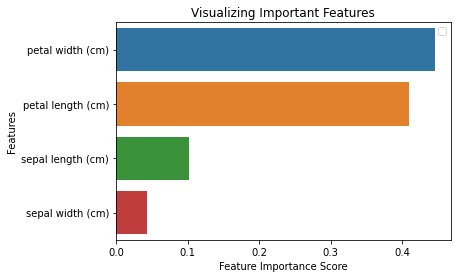

In [8]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [9]:
import yfinance as yf

In [59]:
ggle=yf.Ticker("GOOGL")

In [63]:
data = pd.DataFrame(ggle.history(period="max"))
#data=data[["Open","High","Low","Close","Volume"]]
data.tail()
print(data)

               Open     High      Low    Close    Volume  Dividends  \
Date                                                                  
2004-08-19    50.05    52.08    48.03    50.22  44659096          0   
2004-08-20    50.56    54.59    50.30    54.21  22834343          0   
2004-08-23    55.43    56.80    54.58    54.75  18256126          0   
2004-08-24    55.68    55.86    51.84    52.49  15247337          0   
2004-08-25    52.53    54.05    51.99    53.05   9188602          0   
...             ...      ...      ...      ...       ...        ...   
2021-03-15  2044.98  2054.99  2027.79  2054.44   1308400          0   
2021-03-16  2065.99  2113.68  2059.29  2083.89   1592800          0   
2021-03-17  2068.47  2099.00  2044.12  2082.22   1292400          0   
2021-03-18  2048.18  2068.75  2019.18  2021.34   1585000          0   
2021-03-19  2029.73  2037.04  2002.93  2026.96   2302700          0   

            Stock Splits  
Date                      
2004-08-19           0

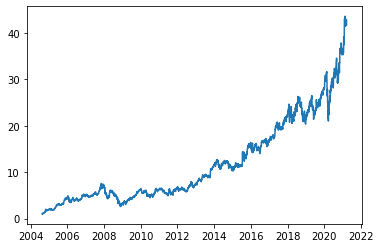

In [64]:
plt.plot(data["Low"]/data["Low"][0])
plt.show()

In [172]:
from finta import *
from finta.utils import resample



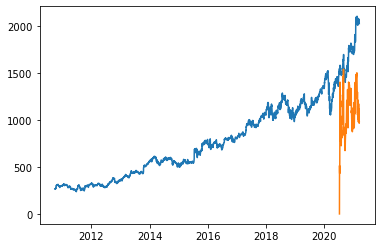

In [173]:
#plt.plot(TA.BBANDS(data[data["Low"]["2010-10-01":]]))
#plt.plot((data["Low"][4000:]+data["High"][4000:])/2)
plt.plot(data["Open"]["2010-10-01":])
plt.plot(TA.RSI(data[4000:])*20)
plt.show()

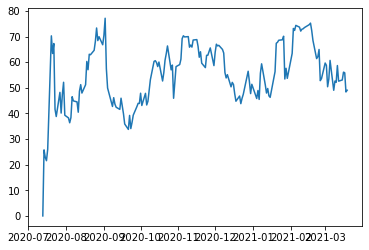

In [174]:
plt.plot(TA.RSI(data[4000:]))
plt.show()

In [175]:
cac40=yf.Ticker("^FCHI")
loreal = yf.Ticker("OR.PA")


In [185]:
cac40_hist, loreal_hist = pd.DataFrame(cac40.history(period="max")),pd.DataFrame(loreal.history(period="max"))

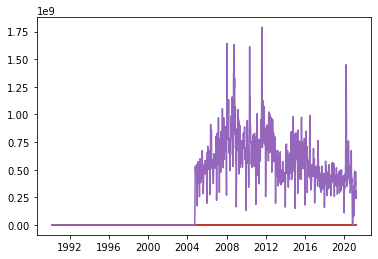

In [197]:
cac40_hist.columns = map(str.lower, cac40_hist.columns)
cac40_hist=resample(cac40_hist,"7d")

a = TA.ROC(cac40_hist, period=1)


plt.plot(cac40_hist)

Date
1990-03-01         NaN
1990-03-08    3.510638
1990-03-15   -0.411100
1990-03-22    0.051600
1990-03-29    3.197524
                ...   
2021-02-18    0.557421
2021-02-25    0.553296
2021-03-04    2.752802
2021-03-11    1.072856
2021-03-18   -0.939087
Freq: 7D, Name: ROC, Length: 1621, dtype: float64


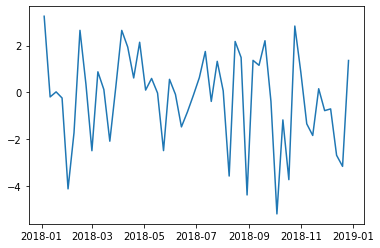

In [199]:
plt.plot(a["2018"])
#plt.plot(cac40_hist["2018-01"])
print(a)